Compare qPCR and amplicon sequencing results for plates 10 & 11

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import linregress

In [3]:
QPCR_FN = '20200318_pk10_amplicon-plate10-11_summary.xlsx'
AMPSEQ_V1_FN = '../../../data/phylo_ampl_dada2/run10_11/dada2/output/stats.tsv'
AMPSEQ_V2_FN = '../../../data/phylo_ampl_dada2/run10_11_v2/dada2/output/stats.tsv'
AMPSEQ_V3_FN = '../../../data/phylo_ampl_dada2/run10_11_v3/dada2/output/stats.tsv'

## Process qPCR data

In [4]:
qpcr_df = pd.read_excel(QPCR_FN, skiprows=2)
# remove irrelevant samples (plates 1&2 and serial dilution)
qpcr_df = qpcr_df[qpcr_df.qpcr_pass]
qpcr_df

,Include,Pos,Name,Sample,orig_sample,qpcr_pass,533-580 rep1,533-580 rep2,avg 533,uninfected average,465-510 rep1,465-510 rep2,avg 456,uninfected average.1,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
96,True,A1,Sample 1,"feed 16 - D9 1 - 1st lysis, 0.52ng/ul",e1_f16_9d1,True,1.680,1.970,1.8250,NaN,1.685,1.638,1.6615,NaN,NaN,NaN,NaN,NaN,NaN
97,True,B1,Sample 13,"feed 16 - D9 2 - 1st lysis, 1.07ng/ul",e1_f16_9d2,True,1.849,1.842,1.8455,NaN,20.698,22.268,21.4830,NaN,NaN,NaN,NaN,NaN,NaN
98,True,C1,Sample 25,"feed 16 - D9 3 - 1st lysis, 0.83ng/ul",e1_f16_9d3,True,1.575,2.390,1.9825,NaN,20.323,30.950,25.6365,NaN,NaN,NaN,NaN,NaN,NaN
99,True,D1,Sample 37,"feed 16 - D9 4 - 1st lysis, 0.73ng/ul",e1_f16_9d4,True,1.435,1.544,1.4895,NaN,20.383,26.277,23.3300,NaN,NaN,NaN,NaN,NaN,NaN
100,True,E1,Sample 49,"feed 16 - D9 5 - 1st lysis, 0.99ng/ul",e1_f16_9d5,True,2.123,2.400,2.2615,NaN,28.194,32.169,30.1815,NaN,NaN,NaN,NaN,NaN,NaN
101,True,F1,Sample 61,"feed 16 - D9 6 - 1st lysis, 0.47ng/ul",e1_f16_9d6,True,1.634,1.913,1.7735,NaN,24.614,30.147,27.3805,NaN,NaN,NaN,NaN,NaN,NaN
102,True,G1,Sample 73,"feed 16 - D9 7 - 1st lysis, 0.65ng/ul",e1_f16_9d7,True,0.666,0.985,0.8255,NaN,10.670,16.531,13.6005,NaN,NaN,NaN,NaN,NaN,NaN
103,True,H1,Sample 85,"feed 16 - D9 8 - 1st lysis, 0.69ng/ul",e1_f16_9d8,True,2.317,1.510,1.9135,NaN,30.988,19.701,25.3445,NaN,NaN,NaN,NaN,NaN,NaN
104,True,A3,Sample 3,"feed 16 - D9 9 - 1st lysis, 0.95ng/ul",e1_f16_9d9,True,1.571,1.663,1.6170,NaN,23.222,24.454,23.8380,NaN,NaN,NaN,NaN,NaN,NaN
105,True,B3,Sample 15,"feed 16 - D9 10 - 1st lysis, 0.76ng/ul",e1_f16_9d10,True,2.099,1.844,1.9715,NaN,27.466,27.182,27.3240,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# extract Pf dilution series
std_smpls = qpcr_df["Sample"].str.contains('Pf')
standards = qpcr_df.loc[std_smpls,'avg 456'].tolist()
qpcr_df = qpcr_df[~std_smpls]
standards

[30.8945, 24.221, 8.664, 3.4085]

In [6]:
qpcr_df.orig_sample

96      e1_f16_9d1
97      e1_f16_9d2
98      e1_f16_9d3
99      e1_f16_9d4
100     e1_f16_9d5
101     e1_f16_9d6
102     e1_f16_9d7
103     e1_f16_9d8
104     e1_f16_9d9
105    e1_f16_9d10
106    e1_f16_9d11
107    e1_f16_9d12
108    e1_f16_9d13
109    e1_f16_9d14
110    e1_f16_9d15
111    e1_f16_9d16
112     e2_f15_un1
113     e2_f15_un2
114     e2_f15_un3
115     e2_f15_un4
116     e2_f15_un5
117     e2_f15_un6
118     e2_f15_un7
119     e2_f15_un8
120     e2_f15_1d1
121     e2_f15_1d2
122     e2_f15_1d3
123     e2_f15_1d4
124     e2_f15_1d5
125     e2_f15_1d6
126     e2_f15_1d7
127     e2_f15_1d8
128    e2_f15_13d1
129    e2_f15_13d2
130    e2_f15_13d3
131    e2_f15_13d4
132    e2_f15_13d5
133    e2_f15_13d6
134    e2_f15_13d7
135    e2_f15_13d8
Name: orig_sample, dtype: object

## V2 ampseq 

In [7]:
ampseq_df = pd.read_csv(AMPSEQ_V2_FN, sep='\t')
# discard mosquito read counts
ampseq_df = ampseq_df[ampseq_df.target.str.startswith('P')]
ampseq_df

,s_Sample,target,input,filtered,denoisedF,denoisedR,merged,nonchim,final
62,8010_e1_blank,P1,0,0,0,0,0,0,0
63,8010_e1_blank,P2,2,1,1,1,1,1,0
126,8010_e1_f15_13d1,P1,272,271,271,271,271,271,271
127,8010_e1_f15_13d1,P2,1049,1043,1043,1042,977,977,977
190,8010_e1_f15_13d2,P1,145,145,145,145,145,145,145
...,...,...,...,...,...,...,...,...,...
68223,plas_e2_f16_9d7,P2,1,1,1,1,1,1,0
68286,plas_e2_f16_9d8,P1,0,0,0,0,0,0,0
68287,plas_e2_f16_9d8,P2,3,3,3,3,3,3,0
68350,plas_e2_f16_9d9,P1,2,2,2,2,2,2,0


In [8]:
ampseq_df['log_reads'] = np.log10(ampseq_df.input.replace(0,.1))
ampseq_df[['panel', 'orig_sample']] = ampseq_df.s_Sample.str.split('_', n=1, expand=True)
ampseq_df[['extraction','feed','individual']] = ampseq_df.orig_sample.str.split('_', expand=True)
ampseq_df['sampling_point'] = ampseq_df.individual.fillna('').str.split('d').str.get(0)
ampseq_df.loc[ampseq_df.sampling_point.str.startswith('un'), 'sampling_point'] = 'un'

In [9]:
# all qPCR samples should match amplicon sequencing samples
set(qpcr_df.orig_sample) - set(ampseq_df.orig_sample)

set()

In [10]:
# add qPCR results to ampseq results
pf_fl = qpcr_df.set_index('orig_sample')['avg 456'].to_dict()
ampseq_df['qpcr_pf'] = ampseq_df.orig_sample.map(pf_fl)
# also use swapped extractions for qPCR
pf_fl_extr_swap = {}
for (k,v) in pf_fl.items():
    if k.startswith('e1'):
        pf_fl_extr_swap['e2' + k[2:]] = v
    elif k.startswith('e2'):
        pf_fl_extr_swap['e1' + k[2:]] = v
    else:
        raise ValueError(k)
ampseq_df['qpcr_pf_extr_swap'] = ampseq_df.orig_sample.map(pf_fl_extr_swap)
# total number of data points with qpcr data
(~ampseq_df['qpcr_pf'].isna()).sum()

480

P1 8010 
 LinregressResult(slope=8.764186552777899, intercept=13.198334521100394, rvalue=0.8008529977299043, pvalue=5.471983026301061e-10, stderr=1.0631462893118533) 

P2 8010 
 LinregressResult(slope=6.799955651850695, intercept=7.699458416751298, rvalue=0.8416595829428382, pvalue=1.0254416099218705e-11, stderr=0.7077475591938829) 

P1 805 
 LinregressResult(slope=8.25914111421834, intercept=14.284026353960055, rvalue=0.8307312285437012, pvalue=3.2946229005216396e-11, stderr=0.8978075794892301) 

P2 805 
 LinregressResult(slope=6.373635815844886, intercept=11.452537346331162, rvalue=0.7588783217132191, pvalue=1.390958296675063e-08, stderr=0.8872772096358207) 



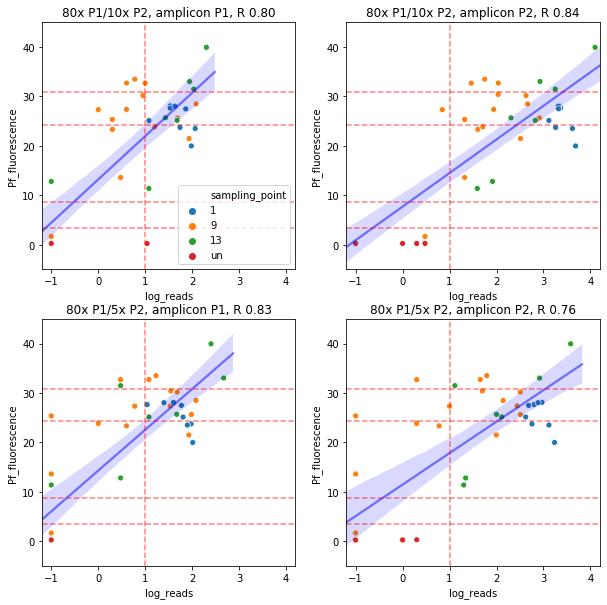

In [12]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
legend='brief'
for p, saxs in zip(['8010','805'], axs):
    for t, ax in zip(['P1','P2'], saxs):
        d = ampseq_df[(ampseq_df.target == t) & (ampseq_df.panel == p) & ~ampseq_df.qpcr_pf.isna()]
        dr = linregress(d.log_reads,d.qpcr_pf)
        print(t, p,'\n',dr,'\n')
        sns.scatterplot(data=d, x='log_reads', y='qpcr_pf', hue='sampling_point', 
                        hue_order=['1','9','13','un'], #'8','14' not qpcr'd
                        legend=legend,
                        ax=ax)
#         if legend=='brief':
#             ax.legend(framealpha=0)
        sns.regplot(data=d, x='log_reads', y='qpcr_pf', 
                    scatter=False,
                    color='b', line_kws={'alpha':.5},
                    ax=ax)
        for s in standards:
            ax.axhline(s, c='r', linestyle='--', alpha=.5)
        ax.axvline(1, c='r', linestyle='--', alpha=.5)
        ax.set_ylabel('Pf_fluorescence')
        if p == '8010':
            pid = '80x P1/10x P2'
        elif p == '805':
            pid = '80x P1/5x P2'
        ax.set_title('{}, amplicon {}, R {:.2f}'.format(pid,t,dr.rvalue))
        ax.set_ylim(-5, 45)
        ax.set_xlim(-1.2,4.2)
        legend = False
# fig.suptitle('Ampseq read counts vs qPCR fluorescence by day');

## v3 ampseq

In [13]:
ampseq_df = pd.read_csv(AMPSEQ_V3_FN, sep='\t')
# discard mosquito read counts
ampseq_df = ampseq_df[ampseq_df.target.str.startswith('P')]
ampseq_df

,s_Sample,target,input,filtered,denoisedF,denoisedR,merged,nonchim,final
62,8010_51_e1_blank,P1,4,4,4,4,4,4,0
63,8010_51_e1_blank,P2,0,0,0,0,0,0,0
126,8010_51_e1_f15_13d1,P1,6134,6121,6121,6120,6120,6120,6120
127,8010_51_e1_f15_13d1,P2,3493,3484,3484,3484,3484,3484,3484
190,8010_51_e1_f15_13d2,P1,3701,3695,3695,3695,3695,3695,3695
...,...,...,...,...,...,...,...,...,...
45439,805_55_e2_f16_9d7,P2,0,0,0,0,0,0,0
45502,805_55_e2_f16_9d8,P1,2,2,2,2,0,0,0
45503,805_55_e2_f16_9d8,P2,2,2,2,2,2,2,0
45566,805_55_e2_f16_9d9,P1,9,9,9,9,9,9,0


In [14]:
ampseq_df['log_reads'] = np.log10(ampseq_df.input.replace(0,.1))
ampseq_df[['panel', 'temp','orig_sample']] = ampseq_df.s_Sample.str.split('_', n=2, expand=True)
ampseq_df[['extraction','feed','individual']] = ampseq_df.orig_sample.str.split('_', expand=True)
ampseq_df['sampling_point'] = ampseq_df.individual.fillna('').str.split('d').str.get(0)
ampseq_df.loc[ampseq_df.sampling_point.str.startswith('un'), 'sampling_point'] = 'un'

In [15]:
# all qPCR samples should match amplicon sequencing samples
set(qpcr_df.orig_sample) - set(ampseq_df.orig_sample)

set()

In [16]:
ampseq_df['qpcr_pf'] = ampseq_df.orig_sample.map(pf_fl)
# total number of data points with qpcr data
(~ampseq_df['qpcr_pf'].isna()).sum()

320

In [19]:
ampseq_df.loc[~ampseq_df['qpcr_pf'].isna(), 'orig_sample'].unique()

array(['e1_f16_9d1', 'e1_f16_9d10', 'e1_f16_9d11', 'e1_f16_9d12',
       'e1_f16_9d13', 'e1_f16_9d14', 'e1_f16_9d15', 'e1_f16_9d16',
       'e1_f16_9d2', 'e1_f16_9d3', 'e1_f16_9d4', 'e1_f16_9d5',
       'e1_f16_9d6', 'e1_f16_9d7', 'e1_f16_9d8', 'e1_f16_9d9',
       'e2_f15_13d1', 'e2_f15_13d2', 'e2_f15_13d3', 'e2_f15_13d4',
       'e2_f15_13d5', 'e2_f15_13d6', 'e2_f15_13d7', 'e2_f15_13d8',
       'e2_f15_1d1', 'e2_f15_1d2', 'e2_f15_1d3', 'e2_f15_1d4',
       'e2_f15_1d5', 'e2_f15_1d6', 'e2_f15_1d7', 'e2_f15_1d8',
       'e2_f15_un1', 'e2_f15_un2', 'e2_f15_un3', 'e2_f15_un4',
       'e2_f15_un5', 'e2_f15_un6', 'e2_f15_un7', 'e2_f15_un8'],
      dtype=object)

P1 8010 
 LinregressResult(slope=8.753886425208224, intercept=8.64389787209276, rvalue=0.9127137619306609, pvalue=2.3769792862008055e-16, stderr=0.6357295370814845) 

P2 8010 
 LinregressResult(slope=7.611162315551359, intercept=2.9310957587482847, rvalue=0.8737327520608571, pvalue=1.8641302744965153e-13, stderr=0.6873528715682903) 

P1 805 
 LinregressResult(slope=8.365540281197648, intercept=9.694346486663244, rvalue=0.8697973392845149, pvalue=3.2226787497140434e-13, stderr=0.7698237756274546) 

P2 805 
 LinregressResult(slope=7.589492565901861, intercept=8.477850138805945, rvalue=0.8453812952298285, pvalue=6.7533064910822765e-12, stderr=0.7779333314179303) 



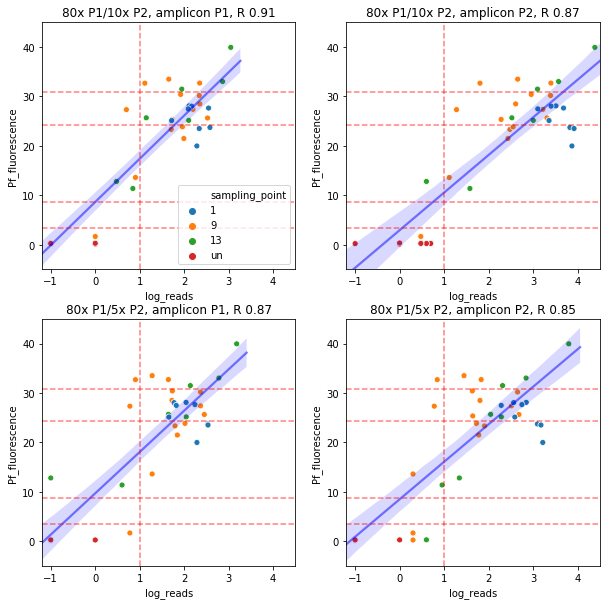

In [17]:
temp = '55'
fig, axs = plt.subplots(2, 2, figsize=(10, 10))
legend = 'brief'
for p, saxs in zip(['8010','805'], axs):
    for t, ax in zip(['P1','P2'], saxs):
        d = ampseq_df[(ampseq_df.target == t) & 
                      (ampseq_df.panel == p) & 
                      (ampseq_df.temp == temp) & 
                      ~ampseq_df.qpcr_pf.isna()]
        dr = linregress(d.log_reads,d.qpcr_pf)
        print(t, p,'\n',dr,'\n')
        sns.scatterplot(data=d, x='log_reads', y='qpcr_pf', hue='sampling_point', 
                        hue_order=['1','9','13','un'], #'8','14' not included
                        legend=legend,
                        ax=ax)
        if legend == 'brief':
            ax.legend(loc='lower right')
        sns.regplot(data=d, x='log_reads', y='qpcr_pf', 
                    scatter=False,
                    color='b', line_kws={'alpha':.5},
                    ax=ax)
        for s in standards:
            ax.axhline(s, c='r', linestyle='--', alpha=.5)
        ax.axvline(1, c='r', linestyle='--', alpha=.5)
        ax.set_ylabel('Pf_fluorescence')
        if p == '8010':
            pid = '80x P1/10x P2'
        elif p == '805':
            pid = '80x P1/5x P2'
        ax.set_title('{}, amplicon {}, R {:.2f}'.format(pid,t,dr.rvalue))
        ax.set_ylim(-5, 45)
        ax.set_xlim(-1.2,4.5)
        legend = False
        
# fig.suptitle('Ampseq read counts vs qPCR fluorescence by day');